# **Ex1 - Unsupervised learning**

## Names and IDs

1.   Roy Paz
2.   List item


In this assignemnt you will practice unsupervised methods we saw in class, and specifically running K-means and visualizing the data using PCA.

In this assignment you will learn a few more things:

1.   Load local files
2.   Load data from Kaggle
3. Use Scikit-learn K-means
4. Use Scikit-learn PCA
5. Some visulaization
6. Evaluate the performance of the clustering using Elbow methods, Siouhette analysis and accuracy (as we have true labels)

Note:
* Read the complete task before implementing.
* Reuse code, write functions.

## Import All Packages
Add all imports needed for this notebook to run

In [2]:
# Implement here
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from keras.datasets import mnist


# Text Clustering And Dimension Reduction

In this exercise you will cluster fake news using `k-means` and visualize the clustering using PCA.

**Import the Fake News Dataset from Kaggle**

Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials.

Then run the cell below and click the upload button to upload kaggle.json to your Colab runtime.

After uploading the kaggle.json the fake news dataset will be copy to the enviroment in the '/content' directory. You will see the two files 'Fake.csv' and 'True.csv'.

For more about the dataset you can read [here](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset).

In [4]:
from google.colab import files

# upload kaggle.json file using user prompt
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

# download the dataset
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

# extract the files
!unzip '/content/fake-and-real-news-dataset.zip'

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes
 81% 33.0M/41.0M [00:00<00:00, 183MB/s] 
100% 41.0M/41.0M [00:00<00:00, 187MB/s]
Archive:  /content/fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


## 1. Read the csv files and create one single dataframe (5 points)

*   Create a dataframe which is the join of the two files 'Fake.csv' and 'True.csv'.
*   Extract the 'text' column from each dataframe (droping title, subject and date columns).
*   Create a single dataframe containing a text column and a label column (fake=0, real=1).

In [5]:
# Implement here
# Example for reading one file. It will work if the previous step was successful.
face_df = pd.read_csv('/content/Fake.csv')
face_df = face_df.drop(columns=['title','subject','date'])
face_df["label"] = [0] * face_df.shape[0]
temp_df = pd.read_csv('/content/True.csv')
temp_df = temp_df.drop(columns=['title','subject','date'])
temp_df["label"] = [1] * temp_df.shape[0]
news_df = pd.concat([face_df,temp_df])
news_df

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


## 2. Cluster the samples into 2 clusters (real and fake) (15 points)

*   Generate TF-IDF features by applying the TfidfVectorizer preprocessor using 1000 features (`max_features=1000`) and remove English stop words.
* Scale the data.
*    Apply k-Means algorithm on the TF-IDF features using n_clusters=2.

In [6]:
# implement TfidfVectorizer
vectorizer = TfidfVectorizer(max_features= 1000, stop_words= 'english')
corpus_vector = vectorizer.fit_transform(news_df["text"])
feature_names = vectorizer.get_feature_names_out()
news_index = [f'text {i}' for i in range(1, news_df.shape[0]+1)]
tf_idf_data = corpus_vector.todense().tolist()
df_tf_idf_vector = pd.DataFrame(data = tf_idf_data, index= news_index,
                                columns= feature_names)

# scale
# Separating out the features
x = df_tf_idf_vector.loc[:, feature_names].values
# Standardizing the features
scale_df = StandardScaler().fit_transform(x)


# implement k-means
kmeans_2 = KMeans(n_clusters = 2 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan')
cluster_labels = kmeans_2.fit_predict(scale_df)
kmeans_2.cluster_centers_

array([[ 8.87334905e-02,  1.34524526e-02,  7.42397473e-05, ...,
        -1.14874079e-02, -9.93998783e-02, -1.32018518e-01],
       [-1.11989820e-01, -1.69782315e-02, -9.36973836e-05, ...,
         1.44981645e-02,  1.25451781e-01,  1.66619501e-01]])

## 3. Visualize using scatter plot (15 points)
The data is high dimensional, so for visualization purpose, we will perform a dimensionality reduction using PCA.

* Apply PCA
*   Visualize the clustering in 2d using first two PCs.
*   Visualize the clustering in 3d using first three PCs.

Notes:

*   In clustering visualization it's important to also visualize the centroids.
* Visualize using matplotlib scatter function. It can be used to plot 2D or 3D scatter plots.
* Color the points according to the true labels.

In [7]:
# Implement two PCA and print centers
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scale_df)
principal_2_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
pca_centers = pca.transform(kmeans_2.cluster_centers_)
pca_centers

array([[-2.68353102,  0.35731494],
       [ 3.38686276, -0.45096429]])

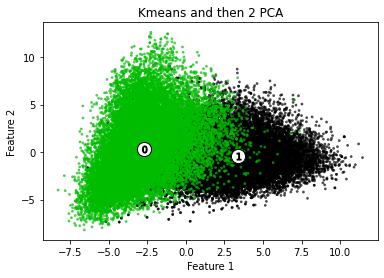

In [12]:
# plot
n_clusters = 2
colors = cm.nipy_spectral(news_df["label"].astype(float) / n_clusters)
plt.scatter(principal_2_df.iloc[:, 0], principal_2_df.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

# Labeling the clusters
centers = pca_centers
# Draw white circles at cluster centers
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)
for i, c in enumerate(centers):
  plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Kmeans and then 2 PCA")
plt.show()

In [14]:
# Implement three PCA and print centers
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(scale_df)
principal_3_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
pca_centers = pca.transform(kmeans_2.cluster_centers_)
pca_centers

array([[-2.68352698,  0.35720748,  0.04515252],
       [ 3.38685766, -0.45082867, -0.05698663]])

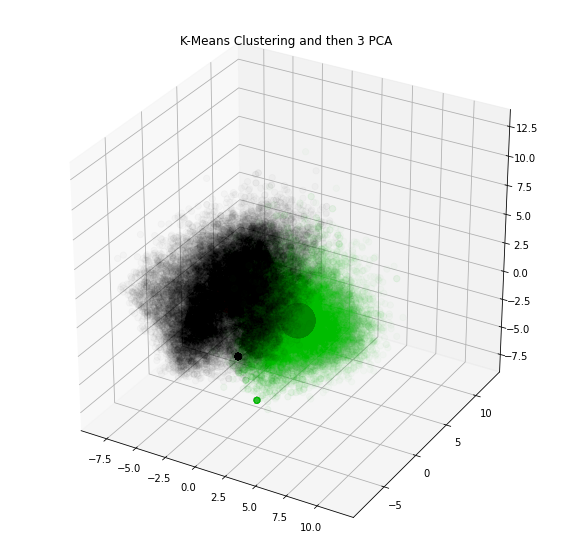

In [16]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

colors = cm.nipy_spectral(cluster_labels.astype(float) / 2)
scatter = ax.scatter(pca_centers[:,0],pca_centers[:,1], c="red", alpha=1, s=1200)
ax.scatter(principalComponents[:, 0], principalComponents[:, 1], principalComponents[:, 2],c=colors,s=40,label="C1", alpha=0.02)
ax.set_title('K-Means Clustering and then 3 PCA')
plt.show()

## 4. Performance evaluation (15 points)
### How did our clustering perform against the real labels?

We do have the true lables (fake/real), but we don't know which cluster correspond to which label. Therefore, we check the two options:

*   Define cluster 1 as fake and cluster 2 as real. What is the accuracy?
*   Define cluster 1 as true and cluster 2 as fake. What is the accuracy?

In [ ]:
# Implement here
# 1 as fake, 2 as real
accuracy_score_1 = accuracy_score(news_df["label"], cluster_labels)
# 1 as real, 2 as fake
labels = [1 if i == 0 else 0 for i in cluster_labels]
accuracy_score_2 = accuracy_score(news_df["label"], labels)
print("Accuracy without PCA", {'1 as fake': accuracy_score_1, '1 as real': accuracy_score_2})


Accuracy without PCA {'1 as fake': 0.1295603367633302, '1 as real': 0.8704396632366698}


## 5. Find optimal `k` (10 points)
What is the best k for clustering?

* Cluster using a range of `k` (up to 20) and compare the SSD and the Silhouette values for every k.
* Plot SSD vs. k and Silhouette score vs. k.

Notes:
* You can get the SSD of a clustering using the `inertia_` attribute of the model.
* Silhouette score using `silhouette_score` function from `sklearn.metrics`. This function accept the model and the data.
* Computing Silhouette may takes long time. Estimate the Silhouette using a sample of 300 samples uisng the argument `sample_size=300`.

In [ ]:
inertia = []
silhouette = []

range_n_clusters = [i for i in range(2,21)]
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters= n_clusters ,init= 'k-means++', n_init= 10 ,max_iter= 300, 
                        tol= 0.0001,  random_state= 111  , algorithm= 'elkan')
    cluster_labels = clusterer.fit_predict(scale_df)

    # ssd
    inertia.append(clusterer.inertia_)
    # The silhouette_score gives the average value for all the samples.
    silhouette.append(silhouette_score(scale_df, cluster_labels, 
                                      sample_size=300))

Text(0, 0.5, 'Silhouette Score')

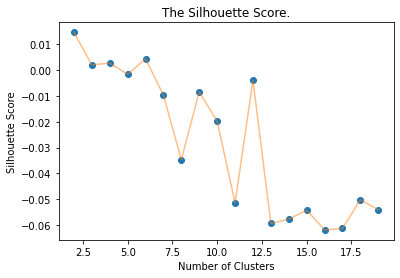

In [ ]:
plt.plot([i for i in range(2,21)] , silhouette , 'o')
plt.plot([i for i in range(2,21)] , silhouette , '-' , alpha = 0.5)
plt.title("The Silhouette Score.")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')


Text(0, 0.5, 'Inertia Score')

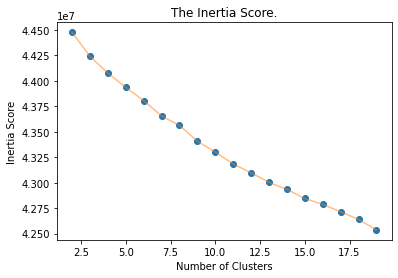

In [ ]:
plt.plot([i for i in range(2,21)] , inertia , 'o')
plt.plot([i for i in range(2,21)] , inertia , '-' , alpha = 0.5)
plt.title("The Inertia Score.")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')


### 6. What is the optimal k for clustering? (10 points)

* As we can see the results are not so good. we can assume that we'll try to use the elbow mathod. we can see that at the k = 8 spot, on the both graphs, the Silhouette Score and the SSD score are balance on average score.
* If optimal k!=2 what can be a good explanation for this?


We can explain this with many assumptions, one of them is that humens are simplify the data and make it - Fake or Real. But, when the kmeans  algorithm fit to the data and make the calculation it can be interpreted as a 'Greay Area', which can be news that can be partially real or fake

# 7. PCA then k-means (10 points)

1.  208421271
2.   List item


This time, lets try to change the order.
1. Generate TF-IDF 1000 features
2. Run PCA (using all dimenssions)
3. Run k-means
4. Plot 2D and 3D scatter plots
5. Estimate the accuracy according to true labels.
6. Explain how is it compared to the previous approach, where clustering is performed w/o PCA.

Note:
* When you compute the PCA, don't limit to first PCs, but use all of them.

In [ ]:
""" Answer """
# implement TfidfVectorizer
vectorizer = TfidfVectorizer(max_features= 1000, stop_words= 'english')
corpus_vector = vectorizer.fit_transform(news_df["text"])
feature_names = vectorizer.get_feature_names_out()
news_index = [f'text {i}' for i in range(1, news_df.shape[0]+1)]
tf_idf_data = corpus_vector.todense().tolist()
df_tf_idf_vector = pd.DataFrame(data = tf_idf_data, index= news_index,
                                columns= feature_names)

# scale
# Separating out the features
x = df_tf_idf_vector.loc[:, feature_names].values
# Standardizing the features
scale_df = StandardScaler().fit_transform(x)

# PCA
cols = [f'component {i}' for i in range(1, scale_df.shape[1]+1)]
pca = PCA()
principalComponents = pca.fit_transform(scale_df)
principal_2_df = pd.DataFrame(data = principalComponents
             , columns = cols)

# Implement kmeans on 2PCA
kmeans_2_pca2 = KMeans(n_clusters = 2 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan')
cluster_labels1 = kmeans_2_pca2.fit_predict(principal_2_df)

# Implement accuracy score
# 1 as fake, 2 as real
accuracy_score_1 = accuracy_score(news_df["label"], cluster_labels1)
# 1 as real, 2 as fake
labels = [1 if i == 0 else 0 for i in cluster_labels1]
accuracy_score_2 = accuracy_score(news_df["label"], labels)
print('2 PCA:', {'1 as fake': accuracy_score_1, '1 as real': accuracy_score_2})


2 PCA: {'1 as fake': 0.1295603367633302, '1 as real': 0.8704396632366698}


In [1]:
#  plot 2D
# plot
n_clusters = 2
colors = cm.nipy_spectral(news_df["label"].astype(float) / n_clusters)
plt.scatter(principal_2_df.iloc[:, 0], principal_2_df.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

# Labeling the clusters
centers = kmeans_2_pca2.cluster_centers_
# Draw white circles at cluster centers
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)
for i, c in enumerate(centers):
  plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
plt.show()

NameError: ignored

We can see the clasters with the true colors, and our two centers plot on the graph

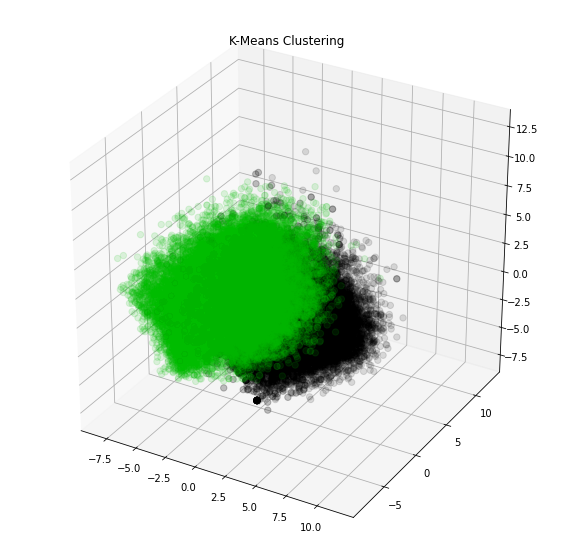

In [ ]:
# plot 3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
centers = kmeans_2_pca2.cluster_centers_

colors = cm.nipy_spectral(news_df["label"].astype(float) / 2)
scatter = ax.scatter(centers[:,0],centers[:,1], c="red", alpha=1, s=1200)
ax.scatter(principal_2_df.iloc[:, 0], principal_2_df.iloc[:, 1], principal_2_df.iloc[:, 2],c=colors,s=40,label="C1", alpha=0.12)
ax.set_title('K-Means Clustering')

plt.show()

# MNIST clustering (10 points)
Redo the same analysis, but this time using the MNIST data set. Notice that this time there are actually 10 'true' clusters.

1. What is the accuracy of the clustering when using k=10? \\
   * When for computing the accuracy of 10 classes, first you need to define what is the label of each cluster. Do that by majority votes. In theory, you may get two or more clusters with the same labels. We will ignore that for now. Meaning that you don't need to bother in case there are two clusters with the same label according to the majority vote. Simply count what is the fraction of 'other' digits in each cluster.
2. What is the optimal k?
3. How do the results changes if you first run PCA?

###Q1

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Data Normalization
# Conversion to float
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

# Reshaping input data
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

# k means 10
kmeans_10 = KMeans(n_clusters = 10 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan')
cluster_labels = kmeans_10.fit_predict(X_train)


<Figure size 432x288 with 0 Axes>

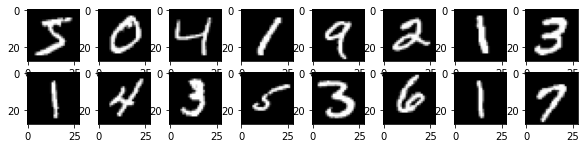

In [ ]:
plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(16):
 plt.subplot(8,8,i+1)
 plt.imshow(x_train[i])

In [ ]:
reference_labels = {}
# For loop to run through each label of cluster label
def retrieve_info(cluster_labels,y_train):
  # Initializing
  reference_labels = {}
  # For loop to run through each label of cluster label
  for i in range(len(np.unique(cluster_labels))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  # change kmeans labels to be same as real labels
  number_labels = np.random.rand(len(cluster_labels))
  for i in range(len(cluster_labels)):
    number_labels[i] = reference_labels[cluster_labels[i]]
  return number_labels

number_labels = retrieve_info(cluster_labels,y_train)

accuracy_score_1 = accuracy_score(y_train, number_labels)
print("Accuracy kmean_10:", accuracy_score_1)

Accuracy kmean_10: 0.5906833333333333


###Q2

In [ ]:
inertia = []
accuracy = []
for n in [10,16,36,64,144,256]:
  kmeans = KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                     tol=0.0001,  random_state= 111  , algorithm='elkan')
  cluster_labels = kmeans.fit_predict(X_train)
  inertia.append(kmeans.inertia_)
  number_labels = retrieve_info(cluster_labels,y_train)
  res = accuracy_score(y_train, number_labels)
  accuracy.append(res)


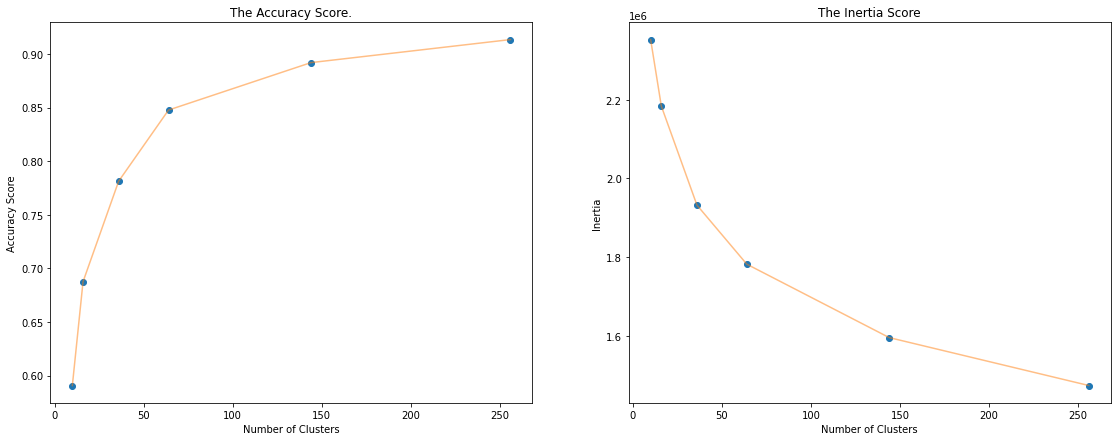

In [ ]:
# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(19, 7)

ax1.plot([10,16,36,64,144,256] , accuracy , 'o')
ax1.plot([10,16,36,64,144,256] , accuracy , '-' , alpha = 0.5)
ax1.set_title("The Accuracy Score.")
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Accuracy Score')

ax2.plot([10,16,36,64,144,256] , inertia , 'o')
ax2.plot([10,16,36,64,144,256] , inertia , '-' , alpha = 0.5)

ax2.set_title("The Inertia Score")
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Inertia')

plt.show()

In [ ]:
print(f'Optimal K is 64 by elbow rule with Accuracy of {accuracy[3]} and Inertia of {inertia[3]}')

Optimal K is 64 by elbow rule with Accuracy of 0.8476333333333333 and Inertia of 1782182.0


###Q3

In [ ]:
pca = PCA(255)
principalComponents = pca.fit_transform(X_train)
inertia = []
accuracy = []
for n in [10,16,36,64,144,256]:
  kmeans = KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                     tol=0.0001,  random_state= 111  , algorithm='elkan')
  cluster_labels = kmeans.fit_predict(principalComponents)
  inertia.append(kmeans.inertia_)
  number_labels = retrieve_info(cluster_labels,y_train)
  res = accuracy_score(y_train, number_labels)
  accuracy.append(res)

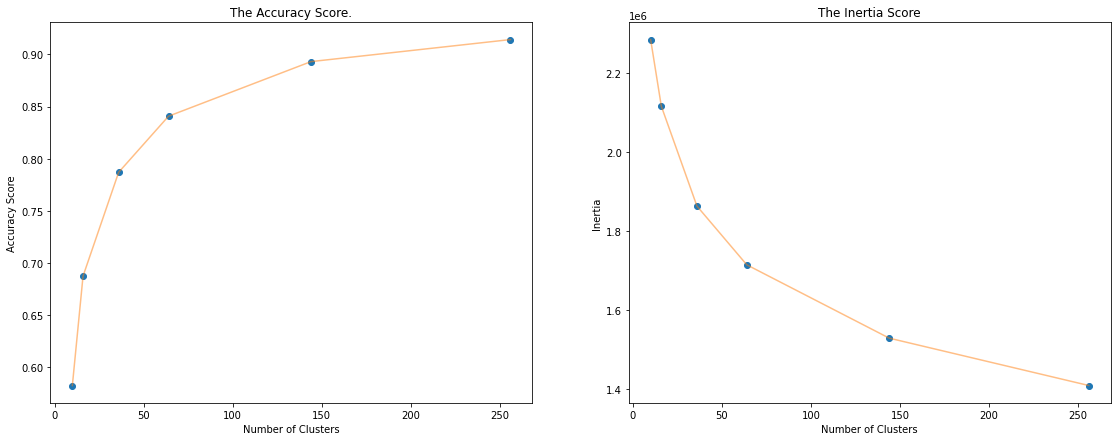

In [ ]:
# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(19, 7)

ax1.plot([10,16,36,64,144,256] , accuracy , 'o')
ax1.plot([10,16,36,64,144,256] , accuracy , '-' , alpha = 0.5)
ax1.set_title("The Accuracy Score.")
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Accuracy Score')

ax2.plot([10,16,36,64,144,256] , inertia , 'o')
ax2.plot([10,16,36,64,144,256] , inertia , '-' , alpha = 0.5)

ax2.set_title("The Inertia Score")
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Inertia')

plt.show()

In [ ]:
print(f'Optimal K is 64 by elbow rule with Accuracy of {accuracy[3]} and Inertia of {inertia[3]}')

Optimal K is 64 by elbow rule with Accuracy of 0.4588333333333333 and Inertia of 9873.037109375


In [ ]:
print('B')

same results


# Compute projection (10 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}

In [ ]:
# Answer here and show your computations (no code)



We choose the first vector (1,2) from the matrix respectively to the higher egienvalues (5). Then we'll dot product each vector.

(1,2) * (1,3) = 7

(1,2) * (3,7) = 17



